# Capacities analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Aca queremos entender cuantas personas trabajan en las ips mas importantes/relevantes a la hora de combatir la pandemia. Para esto, usaremos como proxy la capacidad en camas/pacientes de cada ips junto con un estimado de personas necesarias por cama/paciente

In [2]:
capacities = pd.read_parquet('../data/02_processed/capacities_important.parquet')

In [3]:
capacities.head()

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad
1,CAMPONUEVO CISNE 2,830100595,Privada,NaN,CAMAS,Psiquiatría,15.0
6,PMA MARLY,830014121,Privada,NaN,SALAS,Quirófano,1.0
8,FUNDACION HOSPITAL DE LA MISERICORDIA,899999123,Privada,NaN,CAMAS,Pediátrica,310.0
10,HOSPITAL UNIVERSITARIO MAYOR-MEDERI,900210981,Privada,NaN,CAMAS,Adultos,452.0
13,HOSPITAL MILITAR CENTRAL,830040256,Pública,3.0,CAMAS,Adultos,294.0


In [4]:
capacities.describe(include='all')

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad
count,1388,1388,1388,239.000000,1388,1388,1388.000000
unique,608,252,2,NaN,2,22,NaN
top,HOSPITAL UNIVERSITARIO SAN IGNACIO,800215908,Privada,NaN,CAMAS,Procedimientos,NaN
freq,16,203,1149,NaN,746,358,NaN
mean,NaN,NaN,NaN,2.958159,NaN,NaN,14.355187
std,NaN,NaN,NaN,0.238884,NaN,NaN,32.544661
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,3.000000,NaN,NaN,12.000000


In [5]:
capacities.nit_ips.nunique()

252

In [6]:
# es importante saber cuales son las camas que nos interesan, tal vez psiquatria no
capacities.groupby(['grupo_capacidad', 'descripcion_capacidad']).nit_ips.count()

grupo_capacidad  descripcion_capacidad                      
CAMAS            Adultos                                        141
                 Cuidado Agudo Mental                             8
                 Cuidado Intensivo Adulto                        83
                 Cuidado Intensivo Neonatal                      58
                 Cuidado Intensivo Pediátrico                    29
                 Cuidado Intermedio Adulto                       76
                 Cuidado Intermedio Mental                        2
                 Cuidado Intermedio Neonatal                     58
                 Cuidado Intermedio Pediátrico                   23
                 Cuidado básico neonatal                         50
                 Farmacodependencia                              10
                 Institución Paciente Crónico                    28
                 Obstetricia                                     65
                 Pediátrica                            

Importantes:

- Adultos (Aunque tal vez un poco menos)
- Todas las que mencionan cuidado

Ademas, solo nos quedamos con la categoria `CAMAS`

In [109]:
capacities.loc[lambda x:x.nom_sede_ips.str.contains('SAN')]

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad,capacidad_clave,categoria_capacidad
14,FUNDACION HOSPITAL SAN CARLOS,860007373,Privada,NaN,CAMAS,Adultos,290.0,True,normal
26,FUNDACION SANTA FE DE BOGOTA,860037950,Privada,NaN,CAMAS,Adultos,216.0,True,normal
31,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Adultos,195.0,True,normal
61,HOSPITAL UNIVERSITARIO CLINICA SAN RAFAEL,860015888,Privada,NaN,CAMAS,Adultos,149.0,True,normal
69,UNIDAD DE SERVICIOS DE SALUD SANTA CLARA,900959051,Pública,3.0,CAMAS,Adultos,139.0,True,normal
...,...,...,...,...,...,...,...,...,...
10182,CLINICA COLSANITAS S.A SEBASTIAN DEL BELALCAZAR,800149384,Privada,NaN,CAMAS,Cuidado básico neonatal,1.0,False,otro
10183,CLINICA COLSANITAS S.A SEBASTIAN DEL BELALCAZAR,800149384,Privada,NaN,SALAS,Partos,1.0,False,otro
10184,CLINICA COLSANITAS S.A SEBASTIAN DEL BELALCAZAR,800149384,Privada,NaN,SALAS,Procedimientos,1.0,False,otro
10185,ODONTOSANITAS,800149384,Privada,NaN,SALAS,Quirófano,1.0,False,otro


In [31]:
capacities = (
    capacities.
    assign(categoria_capacidad=lambda x: np.select([x.descripcion_capacidad=='Adultos',
                                                    x.descripcion_capacidad.str.startswith('Cuidado Intensivo'),
                                                    x.descripcion_capacidad.str.startswith('Cuidado Intermedio')],
                                                   ["normal", "intensivo", "intermedio"], 
                                                   default="otro")).
    assign(capacidad_clave=lambda x: x.categoria_capacidad != 'otro')
)

In [32]:
capacities_filtered = capacities.loc[lambda x: x.capacidad_clave]

In [34]:
capacities_filtered.head()

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad,capacidad_clave,categoria_capacidad
10,HOSPITAL UNIVERSITARIO MAYOR-MEDERI,900210981,Privada,NaN,CAMAS,Adultos,452.0,True,normal
13,HOSPITAL MILITAR CENTRAL,830040256,Pública,3.0,CAMAS,Adultos,294.0,True,normal
14,FUNDACION HOSPITAL SAN CARLOS,860007373,Privada,NaN,CAMAS,Adultos,290.0,True,normal
20,HOSPITAL CENTRAL POLICIA NACIONAL,830041314,Pública,3.0,CAMAS,Adultos,232.0,True,normal
26,FUNDACION SANTA FE DE BOGOTA,860037950,Privada,NaN,CAMAS,Adultos,216.0,True,normal


El max por nit y categoria, usamos el max porque al haber ips con el mismo nit de varias ciudades, vimos que las bogotanas tienden a ser las de mayor tamanho. Estamos tambien colocando una cota maxima

In [110]:
capacities_filtered.loc[lambda x:x.nom_sede_ips.str.contains('IGNACIO')]

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad,capacidad_clave,categoria_capacidad
31,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Adultos,195.0,True,normal
1092,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intensivo Adulto,18.0,True,intensivo
1296,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intermedio Neonatal,15.0,True,intermedio
2111,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intensivo Neonatal,9.0,True,intensivo
2860,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intensivo Pediátrico,6.0,True,intensivo
2861,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intermedio Adulto,6.0,True,intermedio
5542,HOSPITAL UNIVERSITARIO SAN IGNACIO,860015536,Privada,NaN,CAMAS,Cuidado Intermedio Pediátrico,2.0,True,intermedio


In [98]:
capacities_filtered.sort_values('nit_ips').head(20)

,nom_sede_ips,nit_ips,naturaleza,nivel_atencion,grupo_capacidad,descripcion_capacidad,capacidad,capacidad_clave,categoria_capacidad
4602,CLINICA AVELLANEDA HERNANDEZ S.A.S.,800006602,Privada,NaN,CAMAS,Adultos,3.0,True,normal
3321,CLINICA SANTA CATALINA,800074904,Privada,NaN,CAMAS,Adultos,5.0,True,normal
55,CLINICA PARTENON,800085486,Privada,NaN,CAMAS,Adultos,155.0,True,normal
2101,CLINICA PARTENON,800085486,Privada,NaN,CAMAS,Cuidado Intensivo Adulto,9.0,True,intensivo
2283,CLINICA PARTENON,800085486,Privada,NaN,CAMAS,Cuidado Intermedio Adulto,8.0,True,intermedio
4595,CLINICA DE LA MUJER,800117564,Privada,NaN,CAMAS,Cuidado Intensivo Neonatal,3.0,True,intensivo
7454,CLINICA DE LA MUJER,800117564,Privada,NaN,CAMAS,Cuidado Intermedio Adulto,1.0,True,intermedio
1578,CLINICA DE LA MUJER,800117564,Privada,NaN,CAMAS,Adultos,12.0,True,normal
5523,CLINICA DE LA MUJER,800117564,Privada,NaN,CAMAS,Cuidado Intensivo Adulto,2.0,True,intensivo
1868,CLINICA DE LA MUJER,800117564,Privada,NaN,CAMAS,Cuidado Intermedio Neonatal,10.0,True,intermedio


In [93]:
capacities_per_name = (capacities_filtered.
     groupby(['nit_ips', 'nom_sede_ips', 'descripcion_capacidad']).
     agg({'capacidad': 'max'}).
     reset_index().
     groupby(['nit_ips', 'nom_sede_ips']).
     agg({'capacidad':'sum'}).
     reset_index().
     rename({'nom_sede_ips':'nombre_ips'}, axis=1)
)
capacities_per_name

,nit_ips,nombre_ips,capacidad
0,800006602,CLINICA AVELLANEDA HERNANDEZ S.A.S.,3.0
1,800074904,CLINICA SANTA CATALINA,5.0
2,800085486,CLINICA PARTENON,172.0
3,800117564,CLINICA DE LA MUJER,28.0
4,800118223,ATARDECER DE LOS AÑOS LTDA,20.0
...,...,...,...
147,900971006,UNIDAD DE SERVICIOS DE SALUD EMAUS,5.0
148,900971006,UNIDAD DE SERVICIOS DE SALUD ENGATIVÁ CALLE 80,149.0
149,900971006,UNIDAD DE SERVICIOS DE SALUD GAITANA I,4.0
150,900971006,UNIDAD DE SERVICIOS DE SALUD SIMÓN BOLÍVAR,162.0


In [94]:
capacities_per_name.to_parquet('../data/02_processed/capacities_per_name.parquet')

In [104]:
capacities_per_nit = (capacities_filtered.
     groupby(['nit_ips', 'descripcion_capacidad']).
     agg({'capacidad': 'median'}).
     reset_index().
     groupby('nit_ips').
     agg({'capacidad':'sum'}).
     reset_index()
)

In [105]:
capacities_per_nit.shape

(75, 2)

In [106]:
capacities_per_nit.head(10)

,nit_ips,capacidad
0,800006602,3.0
1,800074904,5.0
2,800085486,172.0
3,800117564,28.0
4,800118223,20.0
5,800149169,1.5
6,800149384,71.0
7,800149453,114.5
8,800201496,8.0
9,800210375,267.0


In [107]:
capacities_per_nit.to_parquet('../data/02_processed/capacities_per_nit.parquet')

### Camas y shares de capacidades  

In [40]:
capacities_filtered.columns

Index(['nom_sede_ips', 'nit_ips', 'naturaleza', 'nivel_atencion',
       'grupo_capacidad', 'descripcion_capacidad', 'capacidad',
       'capacidad_clave', 'categoria_capacidad'],
      dtype='object')

In [111]:
capacities_breakdown = (capacities_filtered.
     groupby(['nit_ips', 'nom_sede_ips', 'categoria_capacidad']).
     agg({'capacidad': 'max'}).
     reset_index().
     pivot_table(values='capacidad', index=['nit_ips', 'nom_sede_ips'], columns='categoria_capacidad', aggfunc=np.sum, fill_value=0).
     assign(total=lambda x: x[['normal', 'intensivo', 'intermedio']].sum(axis=1)).
     assign(share_intensivo=lambda x:x.intensivo/x.total,
            rank_intensivo=lambda x: x.intensivo.rank(method='max', pct=True),
            rank_total=lambda x: x.total.rank(method='max', pct=True)).
     reset_index().
     rename({'nom_sede_ips':'nombre_ips'}, axis=1)
)

capacities_breakdown.sort_values('rank_total', ascending=False).head()

categoria_capacidad,nit_ips,nombre_ips,intensivo,intermedio,normal,total,share_intensivo,rank_intensivo,rank_total
100,900210981,HOSPITAL UNIVERSITARIO MAYOR-MEDERI,63,45,452,560,0.112500,1.000000,1.000000
71,860007373,FUNDACION HOSPITAL SAN CARLOS,36,52,290,378,0.095238,0.967105,0.993421
52,830040256,HOSPITAL MILITAR CENTRAL,27,8,294,329,0.082067,0.927632,0.986842
81,860037950,FUNDACION SANTA FE DE BOGOTA,40,18,216,274,0.145985,0.973684,0.980263
53,830041314,HOSPITAL CENTRAL POLICIA NACIONAL,12,13,232,257,0.046693,0.756579,0.973684


In [112]:
# guardamos datos de breakdown
capacities_breakdown.to_parquet('../data/02_processed/capacities_breakdown.parquet')

Exploracion de estos datos

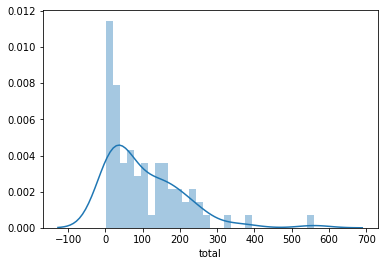

In [60]:
sns.distplot(capacities_breakdown.total, bins = 30)

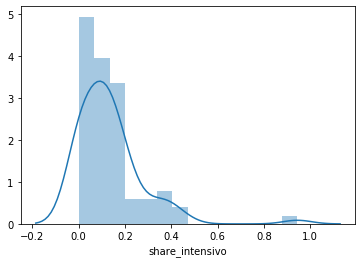

In [61]:
sns.distplot(capacities_breakdown.share_intensivo)

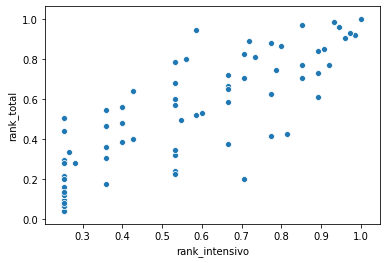

In [64]:
sns.scatterplot(x='rank_intensivo', y='rank_total', data=capacities_breakdown)

Es esperada una relacion lineal aca, podriamos quedarnos con el rank de intensivo/rank total

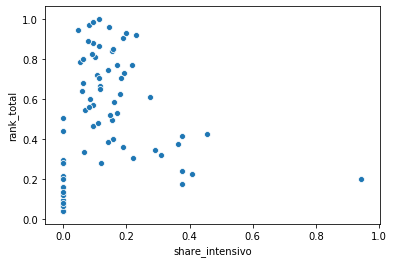

In [67]:
# mas interesante es el share de intensivo vs el total

sns.scatterplot(x='share_intensivo', y='rank_total', data=capacities_breakdown)